In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile as SP
from yellowbrick.model_selection import ValidationCurve, LearningCurve
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stat
import pylab 

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()

    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
         

In [24]:
fData = pd.read_csv("classification/2016_Financial_Data.csv")
fData

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
0,PG,6.529900e+10,-0.0770,3.290900e+10,3.239000e+10,0.000000e+00,1.894900e+10,1.894900e+10,1.344100e+10,5.790000e+08,...,-0.0427,-0.0528,-0.0182,-0.0627,0.0083,0.0000,-0.0809,Consumer Defensive,12.532463,1
1,VIPS,8.148496e+09,0.3156,6.190740e+09,1.957756e+09,2.251378e+08,6.880959e+08,1.567877e+09,3.898789e+08,1.226710e+07,...,0.9234,0.0128,0.1706,0.5109,-0.0139,0.3575,0.3172,Consumer Defensive,4.363319,1
2,KR,1.098300e+11,0.0126,8.549600e+10,2.433400e+10,0.000000e+00,1.794600e+10,2.075800e+10,3.576000e+09,4.820000e+08,...,0.3697,0.0844,0.1115,0.2797,0.0416,0.0000,0.0457,Consumer Defensive,-17.068252,0
3,RAD,2.077024e+10,-0.2171,1.577826e+10,4.991979e+09,0.000000e+00,4.581171e+09,4.621042e+09,3.709370e+08,1.861320e+08,...,0.6322,-0.0645,0.2848,8.5628,0.2581,0.0000,-0.3158,Consumer Defensive,-75.916870,0
4,GIS,1.656310e+10,-0.0605,1.073360e+10,5.829500e+09,0.000000e+00,3.118900e+09,3.270300e+09,2.559200e+09,3.038000e+08,...,-0.0187,-0.0825,-0.0055,-0.0105,-0.0828,0.0000,-0.0628,Consumer Defensive,-1.162942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,TSRI,6.099828e+07,0.0626,5.103888e+07,9.959402e+06,0.000000e+00,9.120526e+06,9.120526e+06,8.388760e+05,0.000000e+00,...,-0.1191,0.0000,0.0027,0.0441,0.0000,0.0000,0.0267,Technology,0.655807,1
4793,TZOO,1.142630e+08,-0.0782,1.385500e+07,1.004080e+08,9.096000e+06,8.112600e+07,9.022200e+07,1.018600e+07,0.000000e+00,...,-0.1209,0.0000,-0.2194,-0.1115,-1.0000,-0.2553,-0.0964,Technology,-35.500002,0
4794,USATP,7.700000e+07,NaN,5.500000e+07,2.200000e+07,NaN,2.200000e+07,2.300000e+07,-1.000000e+06,1.000000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technology,14.840183,1
4795,WSTG,1.646090e+08,-0.5692,1.372780e+08,2.733100e+07,0.000000e+00,1.871500e+07,1.871500e+07,8.616000e+06,-3.180000e+05,...,0.4233,0.1894,0.2085,0.0012,0.0000,0.0000,0.0361,Technology,-2.854095,0


In [25]:
fData.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
count,4.308000e+03,4148.000000,4.157000e+03,4.305000e+03,4.084000e+03,4.184000e+03,4.177000e+03,4.332000e+03,4.177000e+03,4.266000e+03,...,3667.000000,4157.000000,4072.000000,4075.000000,3924.000000,4001.000000,4025.000000,4041.000000,4.797000e+03,4797.000000
mean,4.802586e+09,1.520193,3.060024e+09,1.824267e+09,1.007484e+08,8.308651e+08,1.287227e+09,5.239260e+08,9.451615e+07,4.309792e+08,...,0.005076,0.812488,0.185010,0.583518,0.759701,2.593773,0.149195,0.252307,3.650260e+02,0.670836
std,3.261058e+10,52.397806,2.705305e+10,7.913180e+09,7.347024e+08,3.465465e+09,4.930970e+09,2.548440e+09,4.355067e+08,2.190013e+09,...,0.282685,21.477336,3.848082,14.082608,91.443780,54.310889,3.591208,3.349447,1.940149e+04,0.469959
min,-3.819270e+08,-12.769300,-2.639031e+09,-3.564190e+09,-8.610000e+07,-5.207792e+07,-9.357000e+08,-6.770000e+09,-1.107000e+09,-7.621000e+09,...,-1.000000,-1.000000,-1.000000,-1.000000,-3963.131200,-1.000000,-2.662200,-2.099000,-9.999941e+01,0.000000
25%,5.212225e+07,-0.047275,2.699000e+06,2.659882e+07,0.000000e+00,1.696775e+07,3.431300e+07,-5.629444e+06,0.000000e+00,-9.890840e+06,...,0.000000,-0.049300,0.000000,-0.040700,-0.122950,-0.080100,0.000000,-0.027700,-6.730768e+00,0.000000
50%,4.059750e+08,0.032300,1.422140e+08,1.764620e+08,0.000000e+00,7.584050e+07,1.509050e+08,3.043300e+07,3.275789e+06,1.993900e+07,...,0.000000,0.006000,0.000000,0.040100,0.025650,0.000000,0.000000,0.048700,1.090686e+01,1.000000
75%,2.056847e+09,0.160525,1.106300e+09,8.003870e+08,1.237750e+07,3.505530e+08,5.941360e+08,2.242548e+08,4.717500e+07,1.655055e+08,...,0.040050,0.199100,0.028500,0.146700,0.122550,0.124900,0.000000,0.179200,3.155634e+01,1.000000
max,1.822805e+12,3234.456800,1.548384e+12,2.744210e+11,1.608500e+10,9.704100e+10,9.704100e+10,6.002400e+10,1.517600e+10,6.137200e+10,...,5.400500,1340.695700,217.041700,636.156900,3710.666700,2893.736800,224.818200,122.895700,1.321281e+06,1.000000


In [26]:
fData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 8.2+ MB


In [27]:
fData = fData.rename(columns={"Unnamed: 0": "Symbol"})
data = fData.drop(['Symbol', 'Class', 'Sector'], axis=1)
data = data.loc[:, ~data.columns.str.endswith('PRICE VAR [%]')]
target = fData["Class"]

In [28]:
data.isnull().sum()

Revenue                        489
Revenue Growth                 649
Cost of Revenue                640
Gross Profit                   492
R&D Expenses                   713
                              ... 
Asset Growth                   722
Book Value per Share Growth    873
Debt Growth                    796
R&D Expense Growth             772
SG&A Expenses Growth           756
Length: 221, dtype: int64

In [29]:
data = data.fillna(data.mean())
data.isnull().sum()


Revenue                        0
Revenue Growth                 0
Cost of Revenue                0
Gross Profit                   0
R&D Expenses                   0
                              ..
Asset Growth                   0
Book Value per Share Growth    0
Debt Growth                    0
R&D Expense Growth             0
SG&A Expenses Growth           0
Length: 221, dtype: int64

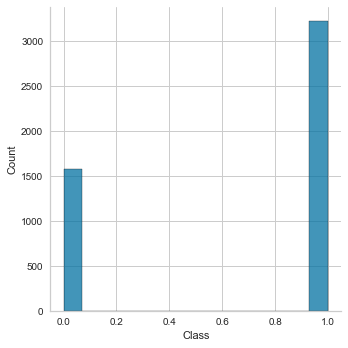

In [30]:
sns.displot(fData.Class)
sns.despine()
plt.tight_layout();

In [31]:
#mi = mutual_info_classif(data, target)
#mi.mean()
#np.argwhere(mi>= 0.021)

In [32]:
# select features with top 5% MI scores
bData = data
selector = SP(mutual_info_classif, percentile=5)
m = selector.fit(data, target)
X_2 = selector.transform(data)


columns = np.asarray(data.columns.values)
support = np.asarray(selector.get_support())
columns_with_support = columns[support]
X_2 = pd.DataFrame(X_2, columns = columns_with_support)

print(columns_with_support)
print(len(columns_with_support))

print(data.shape)
print(X_2.shape)
print(type(X_2.shape))
print(X_2.shape[0])
print(X_2.shape[1])

# 50 -> 55
# 60 -> 66
# 70 -> 77
# 30 -> 66
# 10 -> 11
# 5 -> 11


['SG&A Expense' 'Net Income' 'Net Income Com' 'EPS' 'EPS Diluted' 'EBITDA'
 'Consolidated Income' 'Total assets' 'Total shareholders equity'
 'Depreciation & Amortization' 'Operating Cash Flow']
11
(4797, 221)
(4797, 11)
<class 'tuple'>
4797
11


,SG&A Expense,Net Income,Net Income Com,EPS,EPS Diluted,EBITDA,Consolidated Income,Total assets,Total shareholders equity,Depreciation & Amortization,Operating Cash Flow
count,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03,4.797000e+03
mean,8.308651e+08,3.095961e+08,3.127112e+08,-5.501432e+03,-5.531801e+03,8.441486e+08,3.205348e+08,1.860114e+10,3.408614e+09,2.911248e+08,9.497026e+08
std,3.236427e+09,1.573716e+09,1.605645e+09,2.407982e+05,2.407853e+05,3.340257e+09,1.593025e+09,1.105203e+11,1.596751e+10,1.234407e+09,1.464833e+10
min,-5.207792e+07,-2.155600e+10,-2.155600e+10,-1.373438e+07,-1.373438e+07,-6.012346e+09,-2.155600e+10,0.000000e+00,-1.268800e+10,-4.976500e+07,-3.070000e+11
25%,2.152800e+07,-6.235000e+06,-6.875446e+06,-1.300000e+00,-1.290000e+00,4.304000e+06,-6.213000e+06,2.488010e+08,7.900000e+07,2.805000e+06,3.832000e+06
50%,1.163440e+08,3.001000e+07,2.768679e+07,3.000000e-01,3.000000e-01,1.151990e+08,3.220000e+07,1.547157e+09,4.736360e+08,3.413000e+07,8.336000e+07
75%,8.308651e+08,3.095961e+08,3.127112e+08,1.680000e+00,1.650000e+00,8.441486e+08,3.205348e+08,1.117336e+10,3.347000e+09,2.890000e+08,6.294000e+08
max,9.704100e+10,4.568700e+10,4.568700e+10,1.684010e+05,1.510156e+03,9.936900e+10,4.568700e+10,2.518430e+12,6.920050e+11,3.141066e+10,8.510000e+11


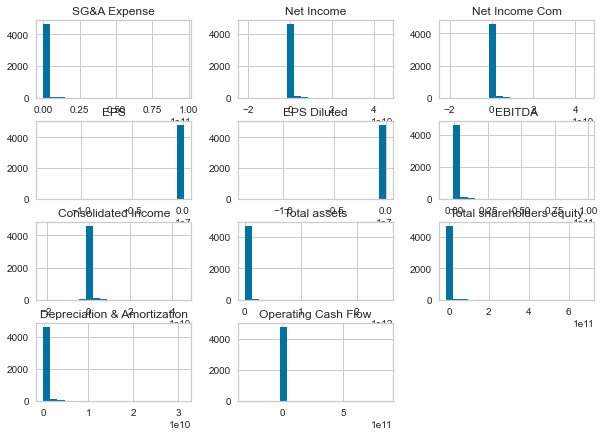

In [33]:
df_filteredFeatures = pd.DataFrame(X_2, columns = columns_with_support)
df_filteredFeatures.hist(bins= 20)
df_filteredFeatures.describe()

In [34]:
scaler = StandardScaler()
data_std = scaler.fit_transform(X_2)
df_data_std = pd.DataFrame(data_std, columns = columns_with_support)
df_data_std

,SG&A Expense,Net Income,Net Income Com,EPS,EPS Diluted,EBITDA,Consolidated Income,Total assets,Total shareholders equity,Depreciation & Amortization,Operating Cash Flow
0,5.598774,6.481136,6.350314,2.286481e-02,0.022992,4.989013,6.455979,0.982138,3.418197,2.257898,0.988973
1,-0.044118,-0.010370,-0.012104,2.285113e-02,0.022978,-0.093285,-0.021094,-0.135626,-0.161798,-0.122130,-0.037005
2,5.288832,1.099045,1.075249,2.285771e-02,0.022985,1.440414,1.085134,0.138413,0.213668,1.456620,0.270864
3,1.158900,-0.091596,-0.091715,2.286232e-02,0.022990,-0.024523,-0.097353,-0.066276,-0.177077,0.056721,0.004452
4,0.707037,0.881956,0.862478,2.286078e-02,0.022988,0.754617,0.889134,0.028153,0.095303,0.256810,0.123884
...,...,...,...,...,...,...,...,...,...,...,...
4792,-0.253931,-0.196496,-0.194529,2.284986e-02,0.022977,-0.252503,-0.200946,-0.168195,-0.212903,-0.235848,-0.064756
4793,-0.231681,-0.192536,-0.190647,2.285098e-02,0.022978,-0.248808,-0.197069,-0.167838,-0.212363,-0.233817,-0.064245
4794,-0.249951,-0.201198,-0.199138,3.777393e-18,0.000000,-0.253345,-0.205627,-0.167554,-0.210049,-0.231815,-0.064431
4795,-0.250966,-0.193000,-0.191102,2.285422e-02,0.022982,-0.250078,-0.197528,-0.167294,-0.211138,-0.235627,-0.064875


In [35]:
df_data_std.describe()

,SG&A Expense,Net Income,Net Income Com,EPS,EPS Diluted,EBITDA,Consolidated Income,Total assets,Total shareholders equity,Depreciation & Amortization,Operating Cash Flow
count,4.797000e+03,4.797000e+03,4.797000e+03,4797.000000,4.797000e+03,4.797000e+03,4.797000e+03,4797.000000,4.797000e+03,4.797000e+03,4797.000000
mean,-3.258691e-17,-5.924893e-18,-5.924893e-18,0.000000,-2.962446e-18,-1.777468e-17,1.777468e-17,0.000000,1.184979e-17,-1.777468e-17,0.000000
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104,1.000104e+00,1.000104e+00,1.000104e+00,1.000104,1.000104e+00,1.000104e+00,1.000104
min,-2.728425e-01,-1.389569e+01,-1.362131e+01,-57.019954,-5.702290e+01,-2.052898e+00,-1.373413e+01,-0.168323,-1.008191e+00,-2.761855e-01,-21.025046
25%,-2.500972e-01,-2.007122e-01,-1.990601e-01,0.022844,2.297104e-02,-2.514573e-01,-2.051329e-01,-0.166071,-2.085461e-01,-2.335938e-01,-0.064579
50%,-2.207977e-01,-1.776783e-01,-1.775324e-01,0.022850,2.297764e-02,-2.182543e-01,-1.810171e-01,-0.154322,-1.838286e-01,-2.082146e-01,-0.059149
75%,-3.683745e-17,0.000000e+00,0.000000e+00,0.022856,2.298325e-02,-3.569237e-17,3.741991e-17,-0.067214,-3.859130e-03,-1.721507e-03,-0.021868
max,2.973037e+01,2.883756e+01,2.826217e+01,0.722267,2.924885e-02,2.949926e+01,2.848115e+01,22.621081,4.312935e+01,2.521273e+01,58.036577


array([[<AxesSubplot:title={'center':'SG&A Expense'}>,
        <AxesSubplot:title={'center':'Net Income'}>,
        <AxesSubplot:title={'center':'Net Income Com'}>],
       [<AxesSubplot:title={'center':'EPS'}>,
        <AxesSubplot:title={'center':'EPS Diluted'}>,
        <AxesSubplot:title={'center':'EBITDA'}>],
       [<AxesSubplot:title={'center':'Consolidated Income'}>,
        <AxesSubplot:title={'center':'Total assets'}>,
        <AxesSubplot:title={'center':'Total shareholders equity'}>],
       [<AxesSubplot:title={'center':'Depreciation & Amortization'}>,
        <AxesSubplot:title={'center':'Operating Cash Flow'}>,
        <AxesSubplot:>]], dtype=object)

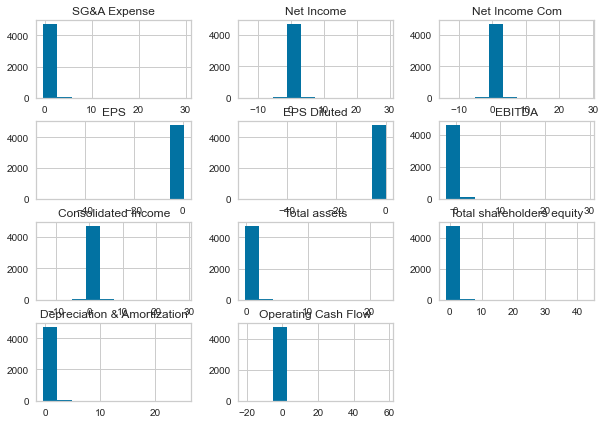

In [36]:
df_data_std.hist()

In [37]:
#for i in range(0,data.shape[1]):
#    plt.figure(figsize=(5,3))
#    plt.title(columns_with_support[i])
#    plt.hist(data[:,i],bins=20)
#    plt.show()

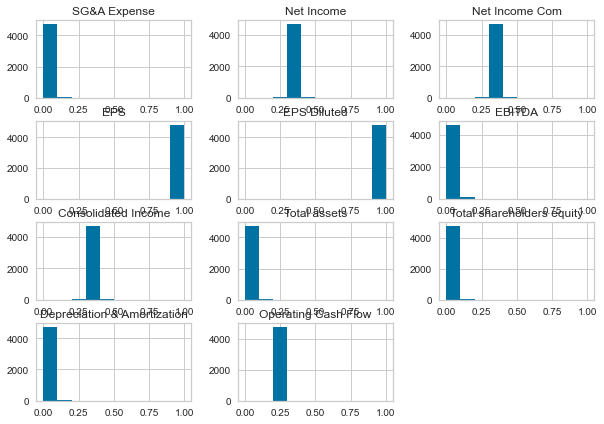

In [38]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
X_3 = min_max.fit_transform(df_data_std)
X_3

df_data_std_min = pd.DataFrame(X_3, columns = df_data_std.columns)
df_data_std_min.hist()
plt.show()

In [39]:
df_data_std_min.describe()

,SG&A Expense,Net Income,Net Income Com,EPS,EPS Diluted,EBITDA,Consolidated Income,Total assets,Total shareholders equity,Depreciation & Amortization,Operating Cash Flow
count,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000,4797.000000
mean,0.009094,0.325173,0.325219,0.987492,0.999487,0.065064,0.325335,0.007386,0.022842,0.010836,0.265932
std,0.033333,0.023403,0.023878,0.017320,0.017530,0.031697,0.023691,0.043885,0.022659,0.039237,0.012650
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000758,0.320476,0.320466,0.987887,0.999890,0.057094,0.320476,0.000099,0.018117,0.001671,0.265116
50%,0.001735,0.321015,0.320980,0.987887,0.999890,0.058146,0.321048,0.000614,0.018677,0.002667,0.265184
75%,0.009094,0.325173,0.325219,0.987887,0.999890,0.065064,0.325335,0.004437,0.022755,0.010768,0.265656
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
train_features, test_features, train_labels, test_labels = train_test_split(
    df_data_std_min, target, random_state=41, stratify=target)

LogisticRegression
0.6708333333333333
     Training    Testing
0   98.832360  61.833333
1   73.922713  63.083333
2   71.504031  65.916667
3   70.558799  65.583333
4   70.252989  66.083333
5   69.474562  65.166667
6   69.113150  67.083333
7   69.224354  66.250000
8   69.502363  67.750000
9   69.279956  66.500000
10  69.502363  67.583333
11  69.196553  67.000000
12  69.252155  66.750000
13  69.113150  66.583333
14  68.779539  65.750000
15  68.974145  66.833333
16  68.557131  67.416667
17  68.584932  67.500000
18  68.807339  67.250000
19  68.723937  67.833333


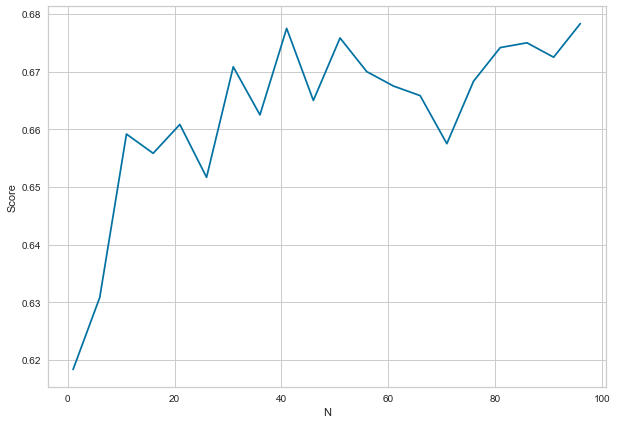

In [41]:
print('LogisticRegression')
lrclf = LogisticRegression(solver="liblinear")
lrclf = lrclf.fit(train_features, train_labels)

results = lrclf.predict(test_features)
print(metrics.accuracy_score(results, test_labels))

scores = []
Training_Accuracy = []
Testing_Accuracy = []
for i in range(1, 101, 5):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(train_features, train_labels)
    results = knn.predict(test_features)
    score = metrics.accuracy_score(results, test_labels)
    scores.append([i, score])
    Training_Accuracy.append(knn.score(train_features, train_labels)*100)
    Testing_Accuracy.append(knn.score(test_features, test_labels)*100)

dfKnn = pd.DataFrame({"Training" : Training_Accuracy, "Testing": Testing_Accuracy})
print(dfKnn)
df = pd.DataFrame(scores, columns=['N', 'Score'])

ax = sns.lineplot(x=df['N'], y=df['Score'])
plt.show()


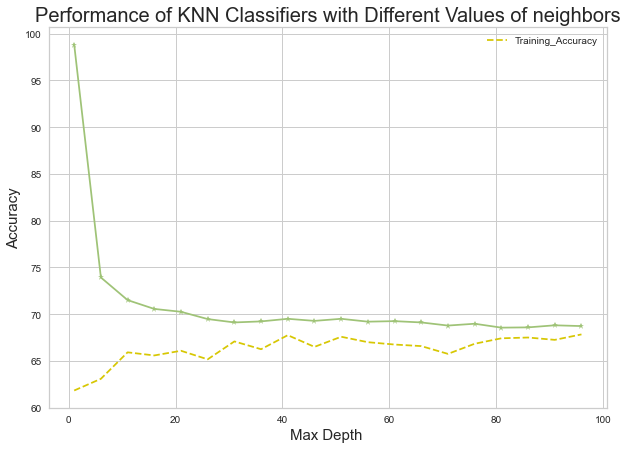

In [42]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(df['N'], Testing_Accuracy, 'y--')
plt.plot(df['N'], Training_Accuracy, 'g-*')
plt.title(
    'Performance of KNN Classifiers with Different Values of neighbors', fontsize=20)
#plt.xlim([0, 11])
#plt.ylim([50, 100])
plt.xlabel('Max Depth ', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(['Training_Accuracy'])
plt.show()


In [43]:
for i in range(3, 150, 3):
    print(i)

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
54
57
60
63
66
69
72
75
78
81
84
87
90
93
96
99
102
105
108
111
114
117
120
123
126
129
132
135
138
141
144
147


In [44]:
np.reciprocal([0,0.5,1, 2., 3.33])

C:\Users\user\AppData\Local\Temp/ipykernel_40528/1161546292.py:1: RuntimeWarning: divide by zero encountered in reciprocal
  np.reciprocal([0,0.5,1, 2., 3.33])


array([      inf, 2.       , 1.       , 0.5      , 0.3003003])

In [45]:
range(5, 151, 10)

range(5, 151, 10)